In [4]:
import os
import sys
import datetime
import pandas as pd

In [5]:
data_dir = "./data"
data_files = [f for f in os.listdir(data_dir) if f.endswith("csv")]
print(data_files)

['google_trends.csv', 'tidy_fred.csv', 'umich_exp.csv', 'us_pau_claims.csv']


In [36]:
full_df = None
for f in data_files:
  print(f)
  df = pd.read_csv(os.path.join(data_dir, f))
  #print(df.head(2))
  #print(df["date"].max())
  if full_df is None:
    full_df = df
  else:
    full_df = full_df.merge(df, on="date", how="outer")
  print(full_df["date"].max())
  #print(full_df.shape)
  #print(full_df.columns)
full_df.sort_values(by="date", inplace=True)
#full_df.set_index("date", inplace=True)
full_df['date'] = pd.to_datetime(full_df['date'])
#print(full_df.dtypes)
full_df.tail(2)

google_trends.csv
2021-04-25
tidy_fred.csv
2021-04-25
umich_exp.csv
2021-04-25
us_pau_claims.csv
2021-04-25


,date,dwd unemployment login wi,dwd unemployment wi,part time jobs hiring near me,jobs hiring,wisconsin unemployment login,unemployment wi login,unemployment,jobs near me,unemployment jobs,...,CSCICP03USM665S,ICSA,CCSA,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,PUA IC,PUA CC,PEUC CC
993,2021-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,553000.0,NaN,NaN,NaN,NaN,NaN,121749.0,NaN,NaN
102,2021-04-25,100.0,8.0,39.0,68.0,0.0,0.0,16.0,71.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ff_df = full_df.copy()
all_cols = ff_df.columns
ff_df[all_cols] = ff_df[all_cols].ffill()
ff_df.columns

Index(['date', 'dwd unemployment login wi', 'dwd unemployment wi',
       'part time jobs hiring near me', 'jobs hiring',
       'wisconsin unemployment login', 'unemployment wi login', 'unemployment',
       'jobs near me', 'unemployment jobs', 'jobs hiring near me',
       'unemployment login', 'wisconsin unemployment', 'jobs',
       'dwd unemployment wi login', 'unemployment wi', 'jobs near me hiring',
       'unemployment wisconsin', 'part time jobs near me hiring',
       'job hiring near me', 'USPRIV', 'LNS12032194', 'CIVPART', 'U6Rate',
       'UEMP27OV', 'CLF16OV', 'UNEMPLOY', 'JTS1000JOL', 'UNRATE', 'JTS1000HIL',
       'JTS1000TSL', 'NPPTTL', 'BSCICP03USM665S', 'CSCICP03USM665S', 'ICSA',
       'CCSA', 'Personal Finance Expected', 'Business Condition 12 Months',
       'Business Condition 5 Years', 'Expected Index', 'PUA IC', 'PUA CC',
       'PEUC CC'],
      dtype='object')

<AxesSubplot:xlabel='date'>

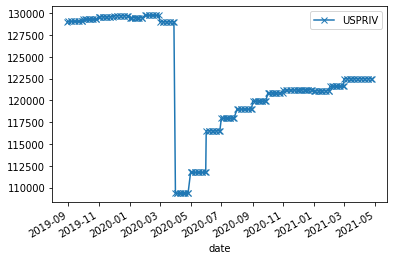

In [43]:
Y = ff_df['USPRIV']
ff_df.iloc[-200:].plot(x='date', y='USPRIV', marker='x')

C:\Users\jmull\Anaconda3\envs\payems\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


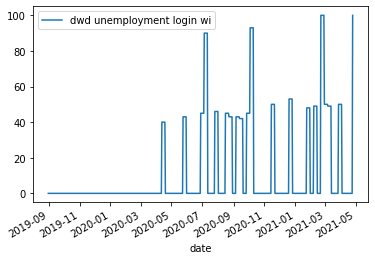

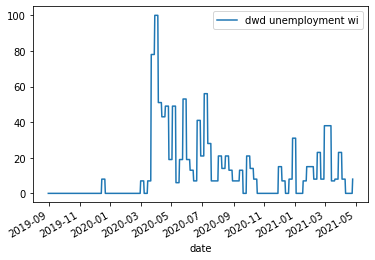

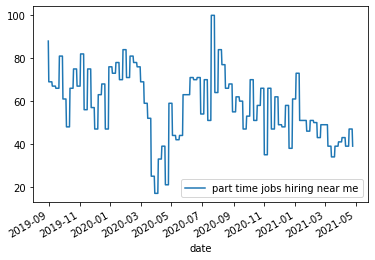

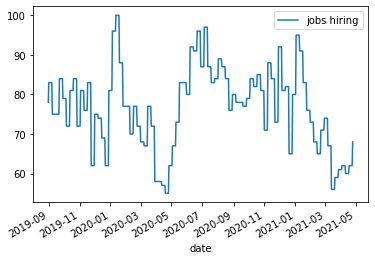

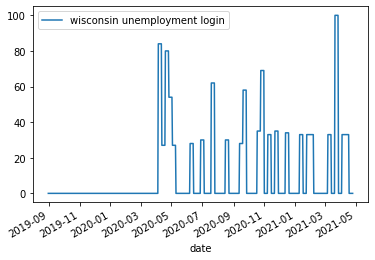

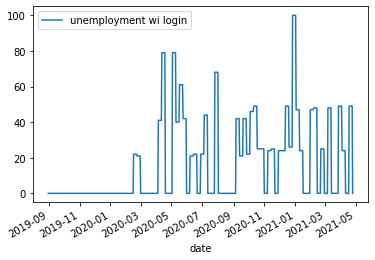

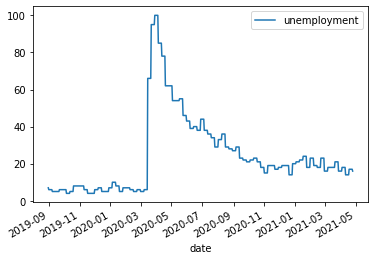

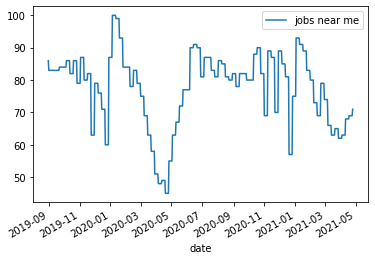

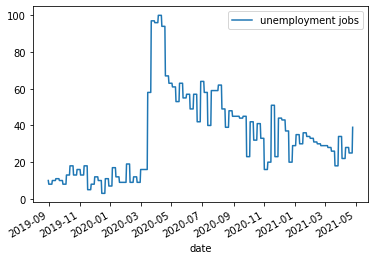

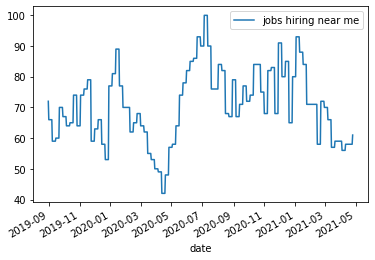

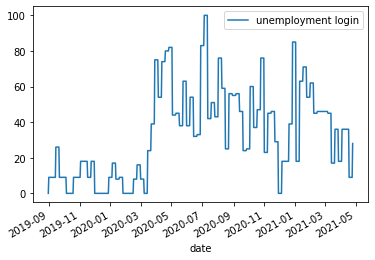

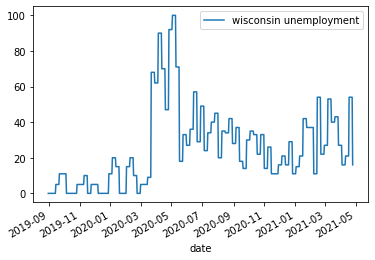

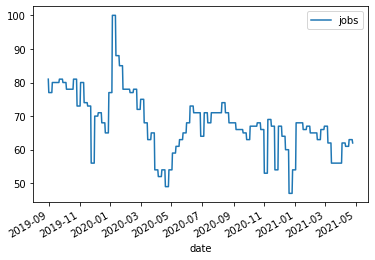

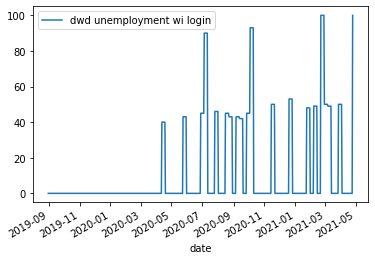

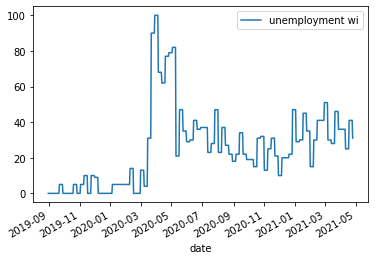

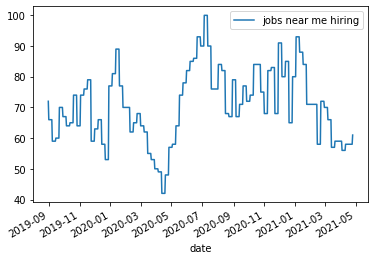

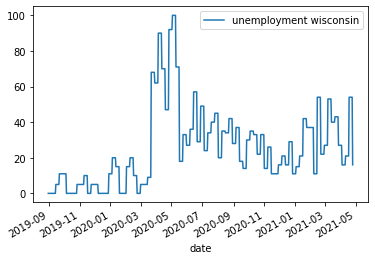

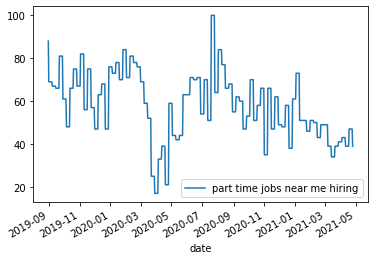

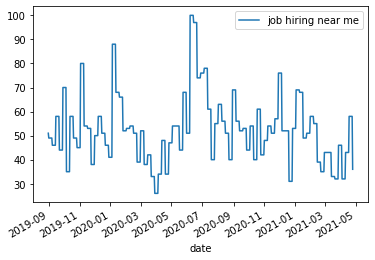

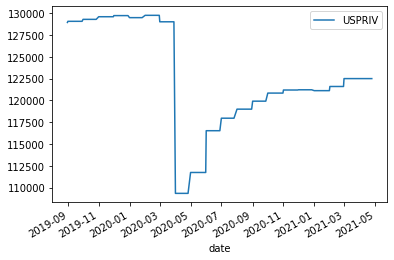

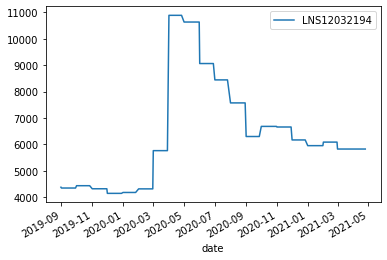

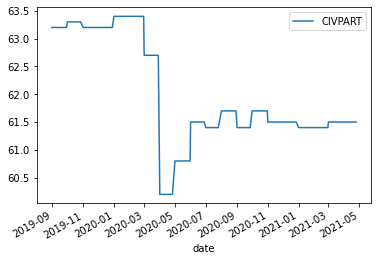

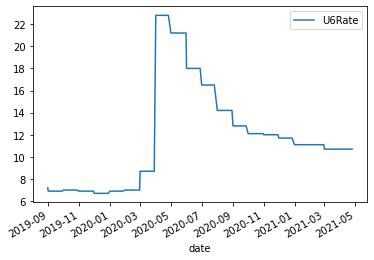

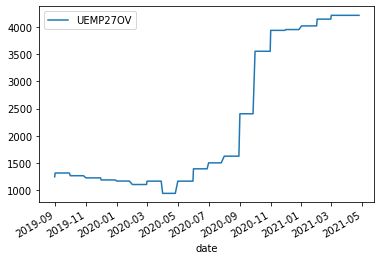

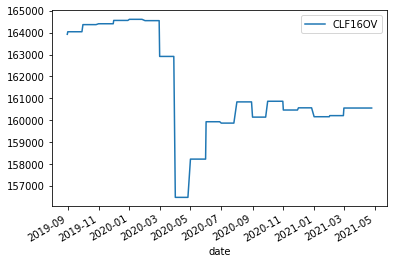

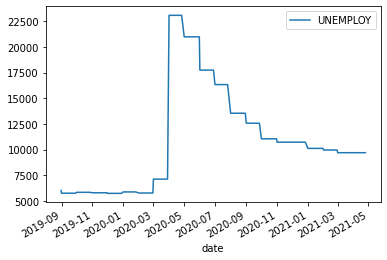

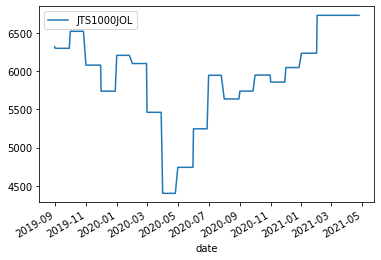

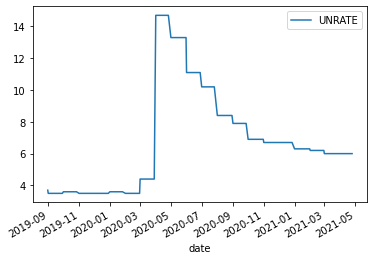

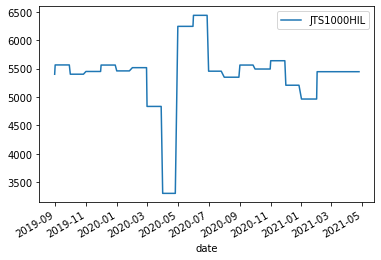

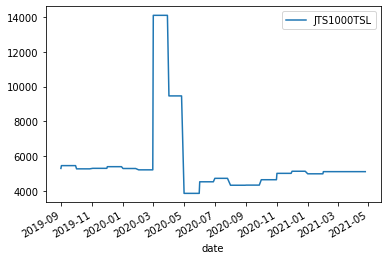

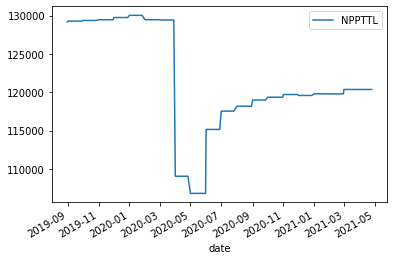

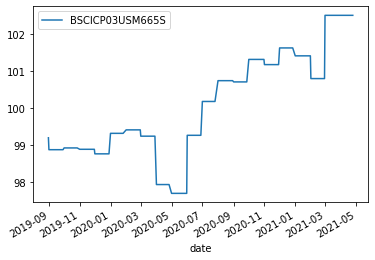

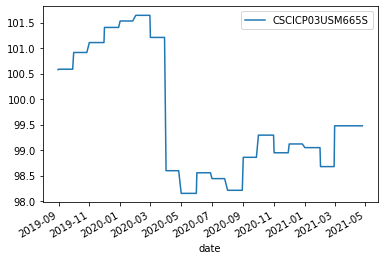

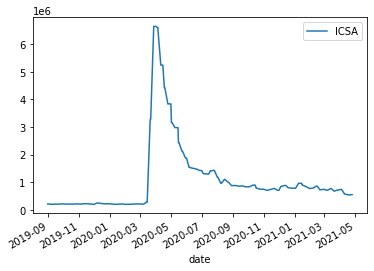

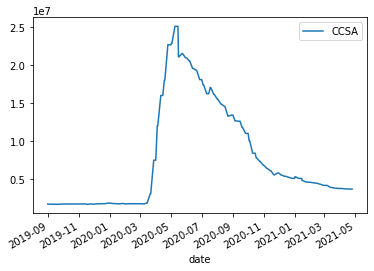

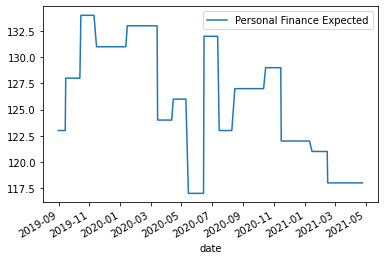

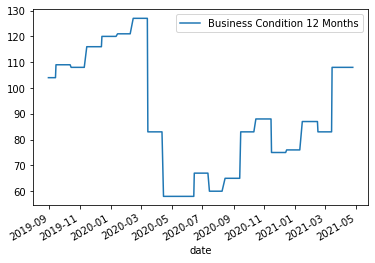

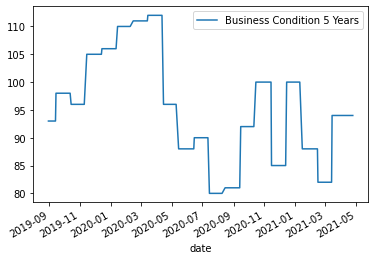

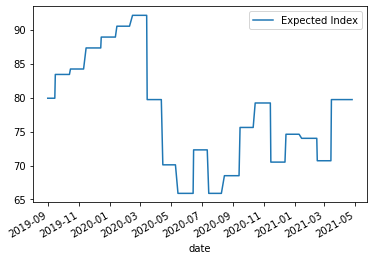

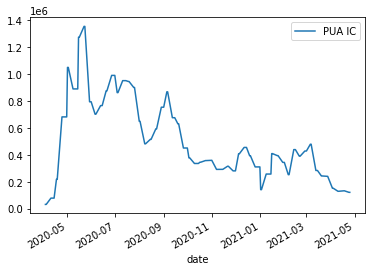

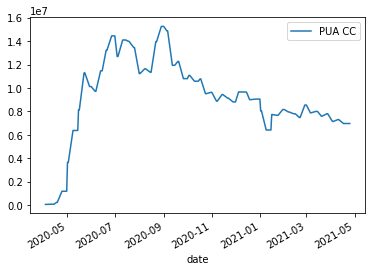

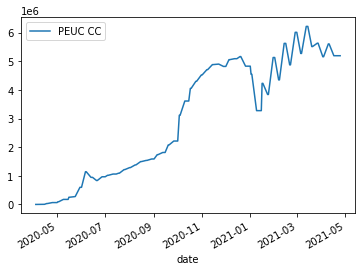

In [46]:
x = ff_df.set_index("date")
for c in x.columns:
  x.iloc[-200:].plot(y=c)